# **2. 동일한 데이터로 딥러닝 분류 수행 (dense layer만 사용)**

In [2]:
# pandas, numpy, matplotlib.pyplot, tensorflow 라이브러리를 가져옴
# sklearn 라이브러리에서 train_test_split함수와 StandardScaler, LabelEncoder, KNeighborsClassifier, train_test_split를 가져옴
# StandardScaler: 데이터를 표준화하는 도구(평균 0, 분산 1)
# LabelEncoder: 범주형 데이터를 숫자형으로 변환
# KNeighborsClassifier: K-최근접 이웃(KNN) 알고리즘을 구현한 것
# train_test_split: 데이터를 학습용과 테스터용으로 나누는 데 사용
# seaborn 라이브러리를 가져옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
# 파일을 읽고 데이터프레임(df)로 저장
df = pd.read_csv("C:/Users/Yujin/Desktop/3-2/Deep-learning-application/dataset/abalone.csv")

In [4]:
# 데이터프레임 출력
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
# Sex를 라벨인코딩해줌
print("Original value counts:")
print(df['Sex'].value_counts())

Original value counts:
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [6]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [7]:
# M: 2, I: 1, F: 0
print("\nLabel encoded data:")
print(df)


Label encoded data:
        id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0    2   0.455     0.365   0.095        0.5140          0.2245   
1        1    2   0.350     0.265   0.090        0.2255          0.0995   
2        2    0   0.530     0.420   0.135        0.6770          0.2565   
3        3    2   0.440     0.365   0.125        0.5160          0.2155   
4        4    1   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ...     ...       ...     ...           ...             ...   
4172  4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173  4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174  4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175  4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176  4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500

In [14]:
print("Value counts after label encoding:")
print(df['Sex'].value_counts())

Value counts after label encoding:
Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64


In [16]:
# "https://github.com/prudhvinathreddymalla/Abalone-Dataset/blob/master/Abalone.ipynb"를 참고해서
# Rings에 1.5를 더하면 age가 된다는 사실을 알고 이를 사용함

df['age'] = df.Rings + 1.5
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [18]:
AgeValues = df['age'].values
AgeIndex = []

for age in AgeValues:
    if age < 8:
        AgeIndex.append('0')  # 젊은 경우
    else:
        AgeIndex.append('1')  # 늙은 경우

AgeIndex = pd.DataFrame(data=AgeIndex, columns=['AgeIndex'])
df['AgeIndex'] = AgeIndex['AgeIndex']

print(df.head())

   id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0    2   0.455     0.365   0.095        0.5140          0.2245   
1   1    2   0.350     0.265   0.090        0.2255          0.0995   
2   2    0   0.530     0.420   0.135        0.6770          0.2565   
3   3    2   0.440     0.365   0.125        0.5160          0.2155   
4   4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings   age AgeIndex  
0          0.1010         0.150     15  16.5        1  
1          0.0485         0.070      7   8.5        1  
2          0.1415         0.210      9  10.5        1  
3          0.1140         0.155     10  11.5        1  
4          0.0395         0.055      7   8.5        1  


In [20]:
df = df.drop('id',axis=1)

In [22]:
df = df.drop('Rings',axis=1)

In [24]:
df = df.drop('age',axis=1)

In [26]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,AgeIndex
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [28]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'AgeIndex'],
      dtype='object')

Text(0.5, 1.0, 'AgeIndex')

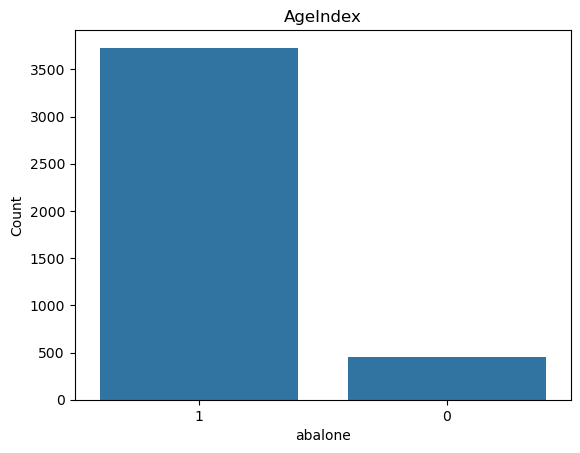

In [30]:
# 결과 개수 확인 (그래프)
sns.countplot(data = df, x="AgeIndex")
plt.xlabel("abalone")
plt.ylabel("Count")
plt.title("AgeIndex")

In [32]:
# 결과 개수 확인 (숫자)
df['AgeIndex'].value_counts()

AgeIndex
1    3729
0     448
Name: count, dtype: int64

In [34]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
AgeIndex          0
dtype: int64

In [36]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
AgeIndex          0
dtype: int64

In [38]:
# 데이터프레임 출력
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,AgeIndex
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


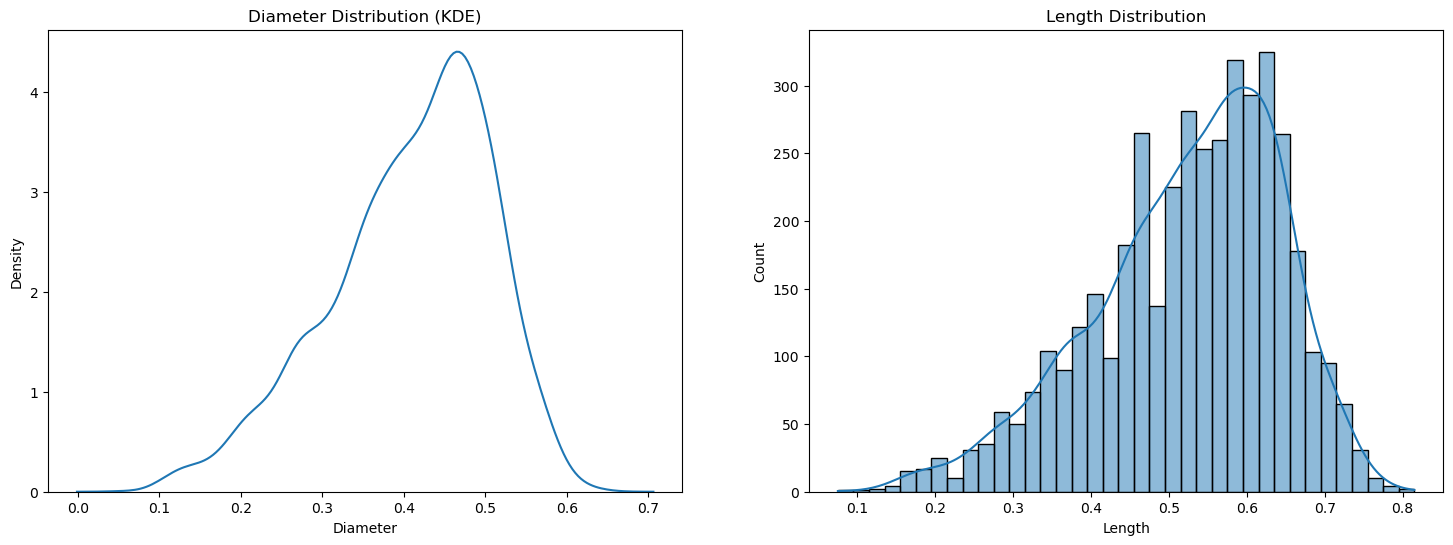

In [40]:
# 컬럼별 히스토그램 확인
# 'Diameter'와'Length' 칼럼을 선택
figure = plt.figure(figsize=(18, 6))

# 'Diameter'의 KDE만 표시
ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(df['Diameter'], ax=ax1)
ax1.set_title('Diameter Distribution (KDE)')

# 'Length'의 히스토그램과 KDE 표시
ax2 = plt.subplot(1, 2, 2)
sns.histplot(df['Length'], kde=True, ax=ax2)
ax2.set_title('Length Distribution')

plt.show()

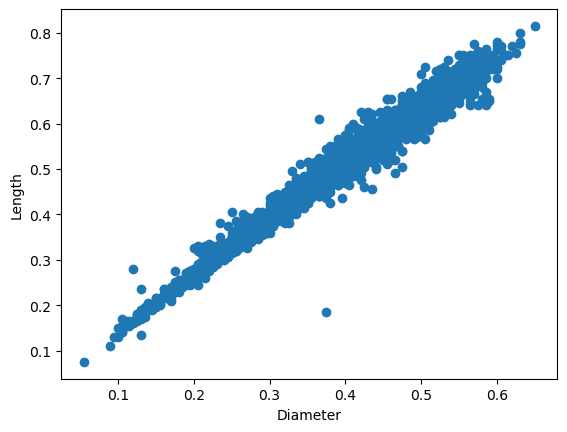

In [42]:
# 산점도 확인
plt.scatter(df['Diameter'], df['Length'])
plt.xlabel('Diameter')
plt.ylabel('Length')

plt.show()

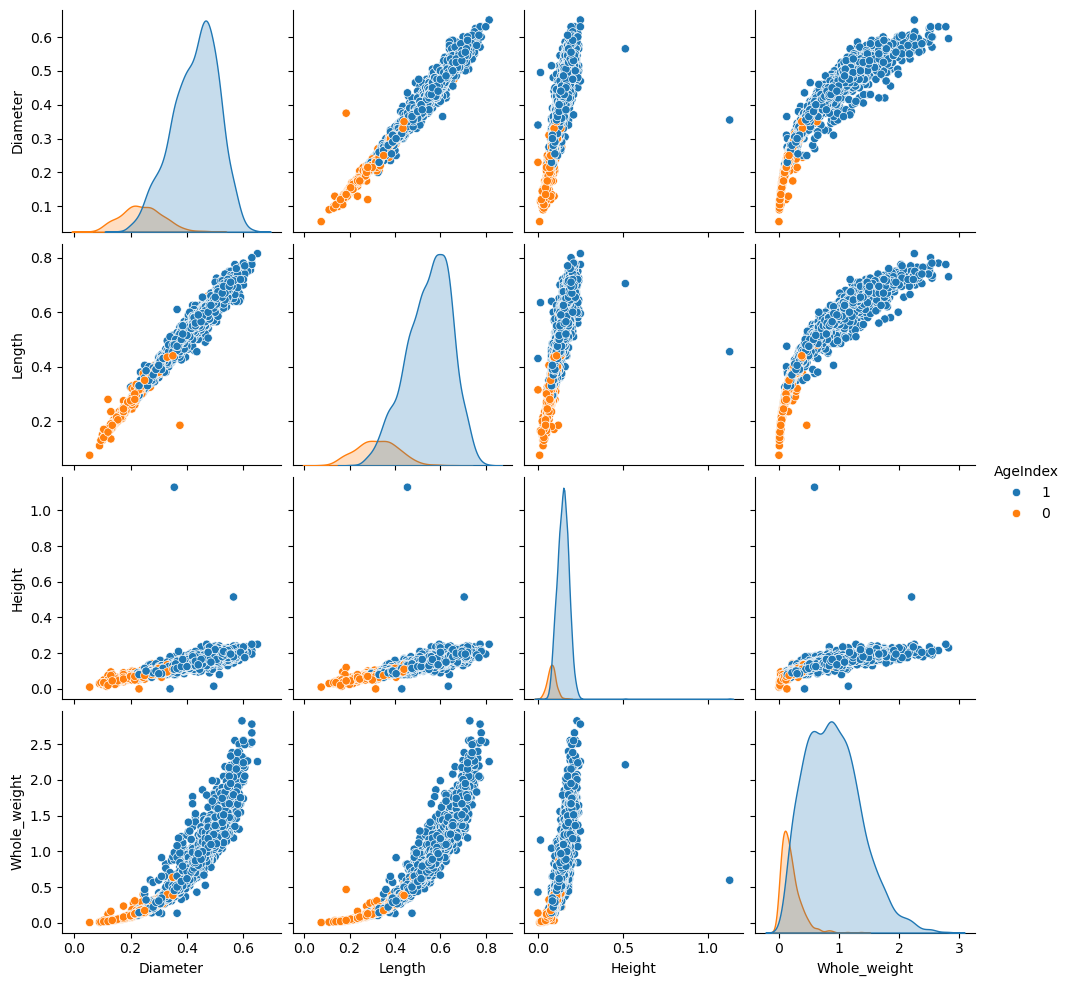

In [44]:
# pairplot를 사용해 각 상관관계 살펴보기
sns.pairplot(df,
             vars=['Diameter', 'Length', 'Height', 'Whole_weight'],
            hue ='AgeIndex')
plt.show()

C:\Users\Yujin\AppData\Local\Temp\ipykernel_11388\327099604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diameter", data=df, palette="Set3")


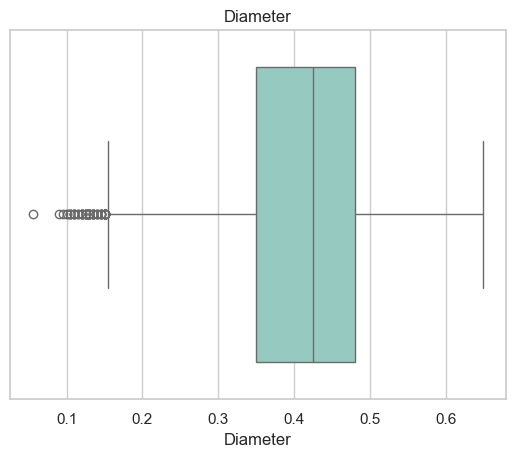

In [45]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Diameter", data=df, palette="Set3")
plt.title("Diameter")
plt.show()

C:\Users\Yujin\AppData\Local\Temp\ipykernel_11388\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


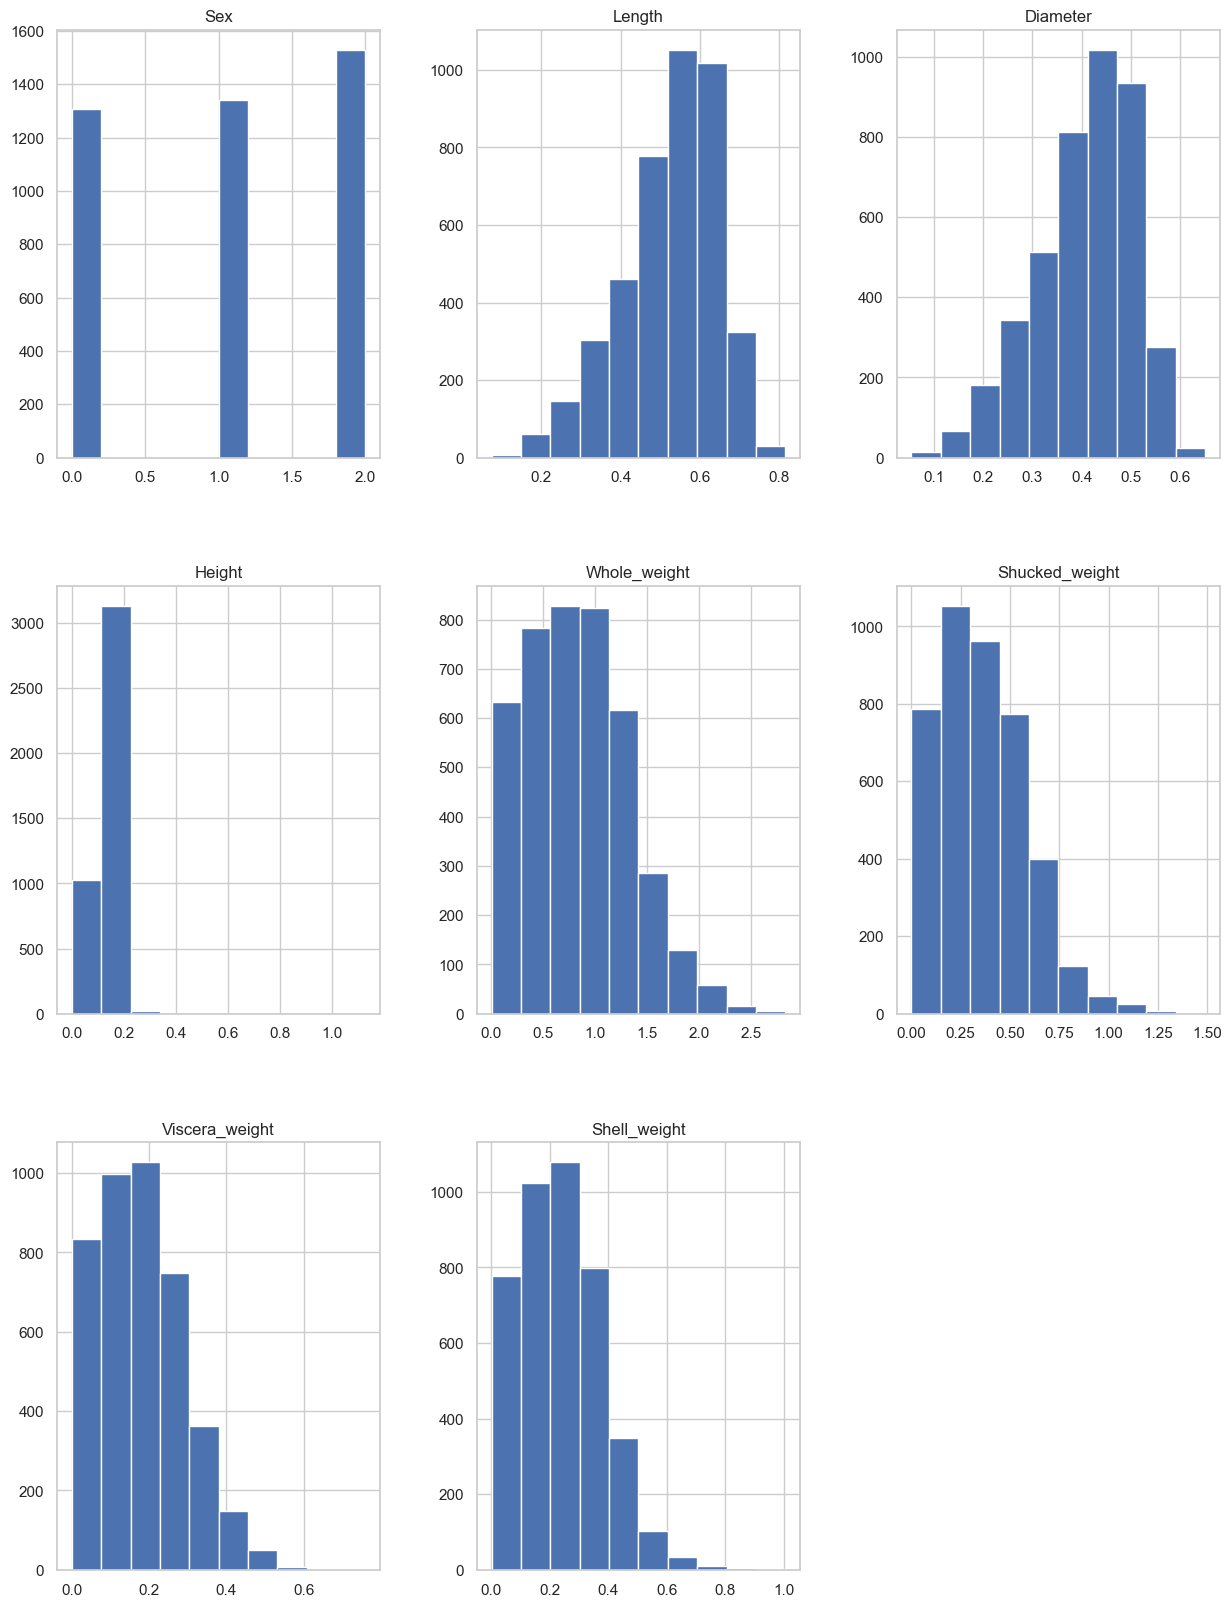

In [46]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [50]:
# AgeIndex 열을 제거, head() 메서드를 사용해 처음 5행을 출력
X=df.drop('AgeIndex',axis=1)
X.head() 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [52]:
# 데이터프레임 출력
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,AgeIndex
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [54]:
# AgeIndex 변수의 클래스 개수를 확인
y=df['AgeIndex']
y.value_counts()

AgeIndex
1    3729
0     448
Name: count, dtype: int64

In [56]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: AgeIndex, dtype: object

In [58]:
# 원-핫 인코딩
Y = pd.get_dummies(y).values

In [60]:
# 딥러닝 입력을 위해 X를 Numpy로 변환
X = X.values

In [62]:
# X 출력
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [64]:
# y 출력
y

0       1
1       1
2       1
3       1
4       1
       ..
4172    1
4173    1
4174    1
4175    1
4176    1
Name: AgeIndex, Length: 4177, dtype: object

In [66]:
# Y 출력
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만,
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [68]:
# 전체 데이터의 20%를 테스트 세트로 사용, 80%는 훈련 세트로 사용
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [70]:
# Sequential: 순차적인 모델을 생성하기 위한 클래스
# Dense: 밀집층(fully connected layer)을 정의하는 클래스
# SGD, Adam: 두 가지 최적화 알고리즘을 제공하는 클래스
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential() # 모델 정의

model.add(Dense(128, input_shape=(8,), activation='relu')) # 128개의 뉴런, 차원 8, ReLU 활성화 함수 사용
model.add(Dense(64, activation='relu')) # 64개의 뉴런, ReLU 활성화 함수 사용
model.add(Dense(2, activation='sigmoid')) # 타겟 클래스의 수는 2, 활성화 함수로 sigmoid 사용

optimizer = Adam(learning_rate=0.001)  # 학습률 조정
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary() # 모델 요약

C:\Users\Yujin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,538 (37.26 KB)

 Trainable params: 9,538 (37.26 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# 모델을 학습시키고 테스트 데이터에 대한 예측 수행
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# 각 레이블에서 가장 큰 값을 가지는 인덱스를 찾아 클래스 레이블로 변환
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8832 - loss: 0.3660 - val_accuracy: 0.8852 - val_loss: 0.2093
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9040 - loss: 0.1954 - val_accuracy: 0.9330 - val_loss: 0.1795
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9248 - loss: 0.1780 - val_accuracy: 0.9450 - val_loss: 0.1693
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9287 - loss: 0.1693 - val_accuracy: 0.9354 - val_loss: 0.1659
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9346 - loss: 0.1628 - val_accuracy: 0.9378 - val_loss: 0.1638
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9328 - loss: 0.1673 - val_accuracy: 0.9414 - val_loss: 0.1629
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9376 - loss: 0.1516 - val_accuracy: 0.9378 - val_loss: 0.1611
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9370 - loss: 0.1549 - val_accuracy: 0

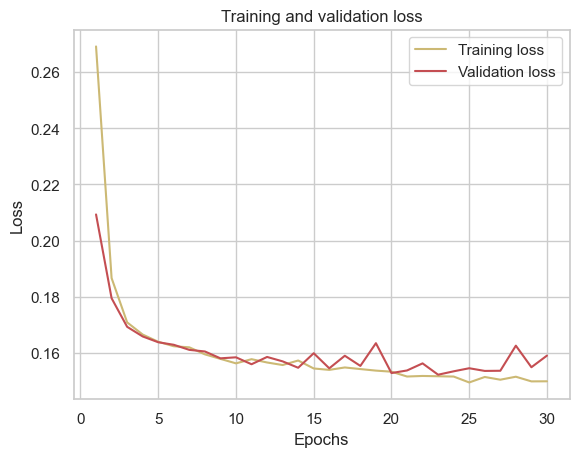

In [73]:
# 손실과 검증 손실을 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

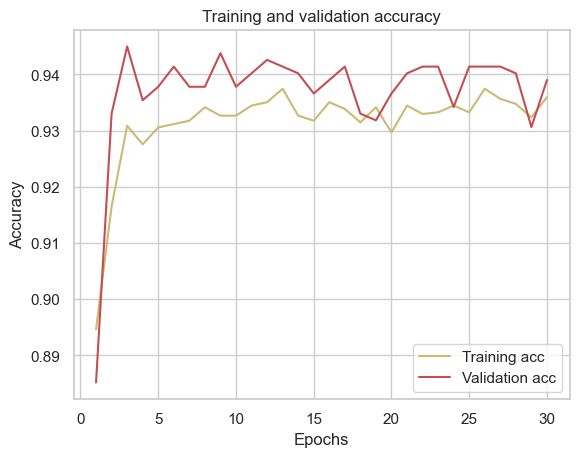

In [74]:
# 정확도와 검증 정확도를 시각화
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
# 모델 성능 평가
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        96
           1       0.97      0.96      0.97       740

    accuracy                           0.94       836
   macro avg       0.85      0.86      0.85       836
weighted avg       0.94      0.94      0.94       836

[[ 73  23]
 [ 28 712]]
